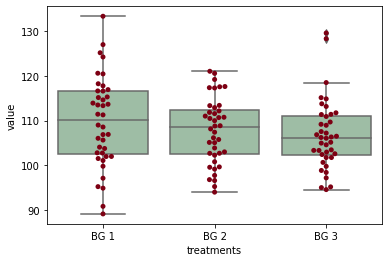

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
# load data file
df = pd.read_csv("./DuongHuyet db.csv")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['Person ID'], value_vars=['BG 1', 'BG 2', 'BG 3'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Person ID  40 non-null     int64  
 1   BG 1       40 non-null     float64
 2   BG 2       40 non-null     float64
 3   BG 3       40 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


Vẽ boxplot để nhìn nhận tổng quát phân phối của dữ liệu

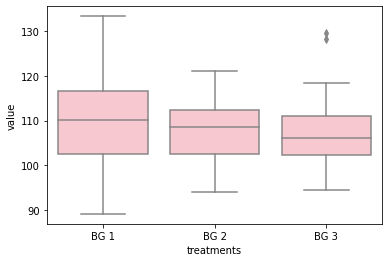

In [12]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='pink')

Bảng phân tích phương sai bằng thư viện

In [13]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,186.374238,93.187119,1.307444,0.274433
Residual,117.0,8339.091851,71.274289,NaN,NaN


**One-way ANOVA Test**

In [14]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['BG 1'], df['BG 2'], df['BG 3'])
print('p_value: ',pvalue)

p_value:  0.2744331871924182


Bảng phân tích phương sai bằng OLS

In [15]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(treatments),186.374238,2.0,1.307444,0.274433
Residual,8339.091851,117.0,NaN,NaN


Trực quan để xem xét phân phối chuẩn của residual

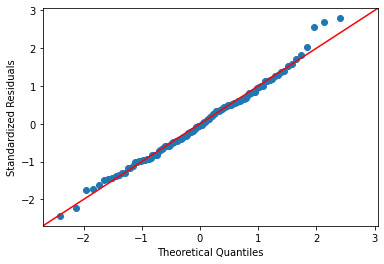

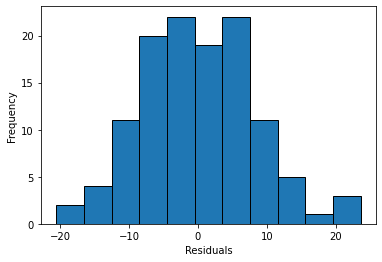

In [16]:

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Kiểm tra phân phối chuẩn của residual dựa vào statistical test - Shapiro Test

In [17]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print('p_value: ',pvalue)

p_value:  0.6138467788696289


Kiểm tra sự đồng nhất phương sai - Barlette's Test

In [18]:
w, pvalue = stats.bartlett(df['BG 1'], df['BG 2'], df['BG 3'])
print('p_value: ', pvalue)

p_value:  0.1100307902225734
